<a href="https://colab.research.google.com/github/IbrahimDarwish/fraud_detection_project/blob/main/notebooks/01_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
df_provider = pd.read_csv('/content/Train-1542865627584.csv')
df_beneficiary = pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
df_inpatient = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
df_outpatient = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')

print("--- df_provider ---")
print(df_provider.head())
print(df_provider.columns)
df_provider.info()

print("\n--- df_beneficiary ---")
print(df_beneficiary.head())
print(df_beneficiary.columns)
df_beneficiary.info()

print("\n--- df_inpatient ---")
print(df_inpatient.head())
print(df_inpatient.columns)
df_inpatient.info()

print("\n--- df_outpatient ---")
print(df_outpatient.head())
print(df_outpatient.columns)
df_outpatient.info()

--- df_provider ---
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
Index(['Provider', 'PotentialFraud'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

--- df_beneficiary ---
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1

## Identify Join Keys and Granularity

### Subtask:
Examine the datasets to identify common columns that can serve as join keys, document the granularity of each dataset, and outline a strategy for merging them for comprehensive analysis.


**Reasoning**:
To assess data quality and completeness, the first step is to calculate the percentage of missing values for each column in all loaded DataFrames as instructed, and then print these percentages for review.



In [ ]:
print("--- Missing values in df_provider ---")
print(df_provider.isnull().sum() * 100 / len(df_provider))

print("\n--- Missing values in df_beneficiary ---")
print(df_beneficiary.isnull().sum() * 100 / len(df_beneficiary))

print("\n--- Missing values in df_inpatient ---")
print(df_inpatient.isnull().sum() * 100 / len(df_inpatient))

print("\n--- Missing values in df_outpatient ---")
print(df_outpatient.isnull().sum() * 100 / len(df_outpatient))

--- Missing values in df_provider ---
Provider          0.0
PotentialFraud    0.0
dtype: float64

--- Missing values in df_beneficiary ---
BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
Chroni

## Exploratory Analysis of Beneficiaries, Claims, and Providers

### Subtask:
Perform initial exploratory data analysis (EDA) on the individual datasets after necessary data cleaning steps. Analyze demographics for beneficiaries, examine claim amounts and durations for inpatient and outpatient claims, and look at the distribution of fraud in provider data. Use descriptive statistics and initial visualizations.


**Reasoning**:
The first part of the subtask involves data cleaning and feature engineering: converting date columns to datetime objects, handling 'RenalDiseaseIndicator' type, calculating 'Age' for beneficiaries, and dropping columns with 100% missing values in `df_inpatient` and `df_outpatient`.



In [ ]:
import numpy as np

# 1. Convert 'DOB' and 'DOD' to datetime objects and 'RenalDiseaseIndicator' to integer
df_beneficiary['DOB'] = pd.to_datetime(df_beneficiary['DOB'])
df_beneficiary['DOD'] = pd.to_datetime(df_beneficiary['DOD'])
# Correctly handle 'RenalDiseaseIndicator' by replacing 'Y' with 1, then converting to numeric and filling NaNs with 0
df_beneficiary['RenalDiseaseIndicator'] = df_beneficiary['RenalDiseaseIndicator'].replace({'Y': 1}).astype(int)

# Calculate Age (using a reference date '2010-01-01' if DOD is null)
reference_date = pd.to_datetime('2010-01-01')
df_beneficiary['Age'] = ((reference_date - df_beneficiary['DOB']).dt.days / 365.25).astype(int)

# 2. Convert date columns in df_inpatient to datetime objects
df_inpatient['ClaimStartDt'] = pd.to_datetime(df_inpatient['ClaimStartDt'])
df_inpatient['ClaimEndDt'] = pd.to_datetime(df_inpatient['ClaimEndDt'])
df_inpatient['AdmissionDt'] = pd.to_datetime(df_inpatient['AdmissionDt'])
df_inpatient['DischargeDt'] = pd.to_datetime(df_inpatient['DischargeDt'])

# 3. Convert date columns in df_outpatient to datetime objects
df_outpatient['ClaimStartDt'] = pd.to_datetime(df_outpatient['ClaimStartDt'])
df_outpatient['ClaimEndDt'] = pd.to_datetime(df_outpatient['ClaimEndDt'])

# 4. Drop 'ClmProcedureCode_6' from df_inpatient
df_inpatient = df_inpatient.drop(columns=['ClmProcedureCode_6'])

# 5. Drop 'ClmProcedureCode_5' and 'ClmProcedureCode_6' from df_outpatient
df_outpatient = df_outpatient.drop(columns=['ClmProcedureCode_5', 'ClmProcedureCode_6'])

print("Data cleaning and feature engineering steps completed for beneficiary, inpatient, and outpatient dataframes.")

Data cleaning and feature engineering steps completed for beneficiary, inpatient, and outpatient dataframes.


**Reasoning**:
The previous steps successfully cleaned and engineered some features. Now, I will proceed with the exploratory data analysis for `df_beneficiary` by displaying descriptive statistics for numerical columns, analyzing the distribution of 'Gender' and 'Race', calculating the total number of chronic conditions, and displaying mean/median for 'Age' and chronic conditions, as per instruction 6 of the subtask.



In [ ]:
print("\n--- df_beneficiary EDA ---")
# 6. For df_beneficiary:
# Display descriptive statistics for numerical columns
print("Descriptive statistics for df_beneficiary numerical columns:")
print(df_beneficiary.describe())

# Analyze the distribution of 'Gender' and 'Race'
print("\nDistribution of Gender in df_beneficiary:")
print(df_beneficiary['Gender'].value_counts(normalize=True) * 100)

print("\nDistribution of Race in df_beneficiary:")
print(df_beneficiary['Race'].value_counts(normalize=True) * 100)

# Calculate the number of chronic conditions each beneficiary has
# Chronic condition columns are those starting with 'ChronicCond_'
chronic_cond_cols = [col for col in df_beneficiary.columns if 'ChronicCond_' in col]

# Convert '2' (No) to '0' for chronic conditions to allow summing
for col in chronic_cond_cols:
    df_beneficiary[col] = df_beneficiary[col].replace(2, 0)

df_beneficiary['NumChronicConditions'] = df_beneficiary[chronic_cond_cols].sum(axis=1)

print("\nMean and Median Age in df_beneficiary:")
print(f"Mean Age: {df_beneficiary['Age'].mean():.2f}")
print(f"Median Age: {df_beneficiary['Age'].median():.2f}")

print("\nMean and Median Number of Chronic Conditions in df_beneficiary:")
print(f"Mean NumChronicConditions: {df_beneficiary['NumChronicConditions'].mean():.2f}")
print(f"Median NumChronicConditions: {df_beneficiary['NumChronicConditions'].median():.2f}")


--- df_beneficiary EDA ---
Descriptive statistics for df_beneficiary numerical columns:
                                 DOB                            DOD  \
count                         138556                           1421   
mean   1936-04-30 16:46:00.772539520  2009-07-27 22:27:46.995073792   
min              1909-01-01 00:00:00            2009-02-01 00:00:00   
25%              1928-01-01 00:00:00            2009-06-01 00:00:00   
50%              1935-09-01 00:00:00            2009-08-01 00:00:00   
75%              1941-12-01 00:00:00            2009-10-01 00:00:00   
max              1983-12-01 00:00:00            2009-12-01 00:00:00   
std                              NaN                            NaN   

              Gender           Race  RenalDiseaseIndicator          State  \
count  138556.000000  138556.000000          138556.000000  138556.000000   
mean        1.570932       1.254511               0.141300      25.666734   
min         1.000000       1.000000     

**Reasoning**:
I have completed the EDA for `df_beneficiary`. Now, following the subtask instructions, I will perform EDA for `df_inpatient` by calculating claim durations and lengths of stay, displaying descriptive statistics for relevant numerical columns, and identifying the top 10 most frequent primary diagnosis codes.



In [ ]:
print("\n--- df_inpatient EDA ---")
# 7. For df_inpatient:
# Calculate 'ClaimDuration' (ClaimEndDt - ClaimStartDt) and 'LengthOfStay' (DischargeDt - AdmissionDt) in days.
df_inpatient['ClaimDuration'] = (df_inpatient['ClaimEndDt'] - df_inpatient['ClaimStartDt']).dt.days
df_inpatient['LengthOfStay'] = (df_inpatient['DischargeDt'] - df_inpatient['AdmissionDt']).dt.days

# Display descriptive statistics for 'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimDuration', and 'LengthOfStay'.
print("Descriptive statistics for df_inpatient numerical columns:")
print(df_inpatient[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimDuration', 'LengthOfStay']].describe())

# Identify and print the top 10 most frequent 'ClmDiagnosisCode_1'.
print("\nTop 10 most frequent ClmDiagnosisCode_1 in df_inpatient:")
print(df_inpatient['ClmDiagnosisCode_1'].value_counts().head(10))


--- df_inpatient EDA ---
Descriptive statistics for df_inpatient numerical columns:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClaimDuration  LengthOfStay
count            40474.000000            39575.0   40474.000000  40474.000000
mean             10087.884074             1068.0       5.660251      5.665168
std              10303.099402                0.0       5.628873      5.638538
min                  0.000000             1068.0       0.000000      0.000000
25%               4000.000000             1068.0       2.000000      2.000000
50%               7000.000000             1068.0       4.000000      4.000000
75%              12000.000000             1068.0       7.000000      7.000000
max             125000.000000             1068.0      36.000000     35.000000

Top 10 most frequent ClmDiagnosisCode_1 in df_inpatient:
ClmDiagnosisCode_1
486      1499
V5789    1158
41401    1088
49121     974
0389      945
5990      844
4280      825
42731     760
41071     718
71536     

**Reasoning**:
Following the subtask instructions, I will now perform EDA for `df_outpatient` by calculating claim durations, displaying descriptive statistics for relevant numerical columns, and identifying the top 10 most frequent primary diagnosis codes.



In [ ]:
print("\n--- df_outpatient EDA ---")
# 8. For df_outpatient:
# Calculate 'ClaimDuration' (ClaimEndDt - ClaimStartDt) in days.
df_outpatient['ClaimDuration'] = (df_outpatient['ClaimEndDt'] - df_outpatient['ClaimStartDt']).dt.days

# Display descriptive statistics for 'InscClaimAmtReimbursed', 'DeductibleAmtPaid', and 'ClaimDuration'.
print("Descriptive statistics for df_outpatient numerical columns:")
print(df_outpatient[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimDuration']].describe())

# Identify and print the top 10 most frequent 'ClmDiagnosisCode_1'.
print("\nTop 10 most frequent ClmDiagnosisCode_1 in df_outpatient:")
print(df_outpatient['ClmDiagnosisCode_1'].value_counts().head(10))


--- df_outpatient EDA ---
Descriptive statistics for df_outpatient numerical columns:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClaimDuration
count           517737.000000      517737.000000  517737.000000
mean               286.334799           2.779233       1.420532
std                694.034343          15.785839       4.707387
min                  0.000000           0.000000       0.000000
25%                 40.000000           0.000000       0.000000
50%                 80.000000           0.000000       0.000000
75%                200.000000           0.000000       0.000000
max             102500.000000         897.000000      23.000000

Top 10 most frequent ClmDiagnosisCode_1 in df_outpatient:
ClmDiagnosisCode_1
4019     13803
4011     12512
2724      3603
2720      3209
2722      3028
2721      2998
2723      2995
78651     2251
78659     2181
78650     2179
Name: count, dtype: int64


**Reasoning**:
I have completed the EDA for `df_outpatient`. Now, as per instruction 9 of the subtask, I will analyze the distribution of 'PotentialFraud' in `df_provider` and display it as a percentage.



In [ ]:
print("\n--- df_provider EDA ---")
# 9. For df_provider:
# Analyze the distribution of 'PotentialFraud' using .value_counts() and display it as a percentage.
print("Distribution of PotentialFraud in df_provider:")
print(df_provider['PotentialFraud'].value_counts(normalize=True) * 100)


--- df_provider EDA ---
Distribution of PotentialFraud in df_provider:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


## Merge Claims Data

### Subtask:
Combine 'df_inpatient' and 'df_outpatient' into a single claims DataFrame, and then merge this combined claims data with 'df_beneficiary' to enrich it with beneficiary demographic information.


**Reasoning**:
To combine the inpatient and outpatient claims, I will concatenate `df_inpatient` and `df_outpatient` into `df_claims`, handling differing columns by filling with NaN. Then, I will merge `df_claims` with `df_beneficiary` on 'BeneID' using a left merge to create `df_claims_beneficiary`, enriching the claims data with beneficiary details.



In [ ]:
print("--- Combining Inpatient and Outpatient Claims ---")
# 1. Concatenate df_inpatient and df_outpatient into df_claims
# Use 'sort=False' to avoid sorting columns and 'join='outer'' to keep all columns from both DataFrames
df_claims = pd.concat([df_inpatient, df_outpatient], ignore_index=True, sort=False)

print(f"Shape of df_inpatient: {df_inpatient.shape}")
print(f"Shape of df_outpatient: {df_outpatient.shape}")
print(f"Shape of combined df_claims: {df_claims.shape}")
print("Columns in df_claims:")
print(df_claims.columns)

print("\n--- Merging Claims with Beneficiary Data ---")
# 2. Merge df_claims with df_beneficiary on 'BeneID'
# Perform a left merge to retain all claims data
df_claims_beneficiary = pd.merge(df_claims, df_beneficiary, on='BeneID', how='left')

print(f"Shape of df_claims_beneficiary after merge: {df_claims_beneficiary.shape}")
print("First 5 rows of df_claims_beneficiary:")
print(df_claims_beneficiary.head())
print("Columns in df_claims_beneficiary:")
print(df_claims_beneficiary.columns)

--- Combining Inpatient and Outpatient Claims ---
Shape of df_inpatient: (40474, 31)
Shape of df_outpatient: (517737, 26)
Shape of combined df_claims: (558211, 31)
Columns in df_claims:
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClaimDuration', 'LengthOfStay'],
      dtype='object')

--- Merging Claims with Beneficiary Data ---
Shape of df_claims_beneficiary after merge: (558211, 57)
First

## Aggregate Claims to Provider Level

### Subtask:
Define and implement an aggregation strategy to consolidate the merged claim-level information into provider-level records. Group the data by 'ProviderId' and calculate various statistical summaries such as total claim counts, average claim amounts, total number of unique beneficiaries, average length of claims, and ratios of different claim types. Ensure that these aggregations are consistent across both inpatient and outpatient claim types where applicable.


**Reasoning**:
I need to aggregate the `df_claims_beneficiary` DataFrame by 'Provider' and calculate the specified statistical summaries as per the instructions, then store the results in `df_provider_features` and display its head and shape.



In [ ]:
print("--- Aggregating Claims Data to Provider Level ---")

# Group by 'Provider' and calculate aggregated features
df_provider_features = df_claims_beneficiary.groupby('Provider').agg(
    TotalClaimCount=('ClaimID', 'count'),
    TotalInscClaimAmtReimbursed=('InscClaimAmtReimbursed', 'sum'),
    AvgInscClaimAmtReimbursed=('InscClaimAmtReimbursed', 'mean'),
    TotalDeductibleAmtPaid=('DeductibleAmtPaid', 'sum'),
    AvgDeductibleAmtPaid=('DeductibleAmtPaid', 'mean'),
    UniqueBeneficiaryCount=('BeneID', 'nunique'),
    AvgClaimDuration=('ClaimDuration', 'mean'),
    AvgLengthOfStay=('LengthOfStay', 'mean'),
    NumChronicConditions_Mean=('NumChronicConditions', 'mean')
).reset_index()

print("First 5 rows of df_provider_features:")
print(df_provider_features.head())
print(f"\nShape of df_provider_features: {df_provider_features.shape}")

--- Aggregating Claims Data to Provider Level ---
First 5 rows of df_provider_features:
   Provider  TotalClaimCount  TotalInscClaimAmtReimbursed  \
0  PRV51001               25                       104640   
1  PRV51003              132                       605670   
2  PRV51004              149                        52170   
3  PRV51005             1165                       280910   
4  PRV51007               72                        33710   

   AvgInscClaimAmtReimbursed  TotalDeductibleAmtPaid  AvgDeductibleAmtPaid  \
0                4185.600000                  5340.0            213.600000   
1                4588.409091                 66286.0            502.166667   
2                 350.134228                   310.0              2.080537   
3                 241.124464                  3700.0              3.175966   
4                 468.194444                  3264.0             45.333333   

   UniqueBeneficiaryCount  AvgClaimDuration  AvgLengthOfStay  \
0           

## Merge Provider Aggregates with Fraud Status

### Subtask:
Merge the provider-level aggregated features with the 'Train-1542865627584.csv' (Provider Data) which contains the 'PotentialFraud' target variable, using 'ProviderId' as the join key. This will create the final provider-level dataset for comparison and modeling.


**Reasoning**:
To merge the aggregated provider features with the fraud status, I will perform a left merge between `df_provider_features` and `df_provider` on the 'Provider' column, then display the first 5 rows and shape of the resulting DataFrame.



In [ ]:
print("--- Merging Provider Aggregates with Fraud Status ---")

# Merge df_provider_features with df_provider on 'Provider'
# Perform a left merge to ensure all aggregated provider features are retained
df_provider_merged = pd.merge(df_provider_features, df_provider, on='Provider', how='left')

print("First 5 rows of df_provider_merged:")
print(df_provider_merged.head())
print(f"\nShape of df_provider_merged: {df_provider_merged.shape}")

--- Merging Provider Aggregates with Fraud Status ---
First 5 rows of df_provider_merged:
   Provider  TotalClaimCount  TotalInscClaimAmtReimbursed  \
0  PRV51001               25                       104640   
1  PRV51003              132                       605670   
2  PRV51004              149                        52170   
3  PRV51005             1165                       280910   
4  PRV51007               72                        33710   

   AvgInscClaimAmtReimbursed  TotalDeductibleAmtPaid  AvgDeductibleAmtPaid  \
0                4185.600000                  5340.0            213.600000   
1                4588.409091                 66286.0            502.166667   
2                 350.134228                   310.0              2.080537   
3                 241.124464                  3700.0              3.175966   
4                 468.194444                  3264.0             45.333333   

   UniqueBeneficiaryCount  AvgClaimDuration  AvgLengthOfStay  \
0         

## Compare Fraudulent and Legitimate Providers

### Subtask:
Using the provider-level dataset, compare fraudulent and legitimate providers. Calculate descriptive statistics (e.g., mean, median, standard deviation) for key aggregated features grouped by 'PotentialFraud' status.


**Reasoning**:
To compare fraudulent and legitimate providers, I will group the 'df_provider_merged' DataFrame by 'PotentialFraud' and calculate the mean, median, and standard deviation for the specified numerical features, then print the results.



In [ ]:
print("--- Comparing Fraudulent and Legitimate Providers ---")

# Define the numerical features to analyze
comparison_features = [
    'TotalClaimCount',
    'TotalInscClaimAmtReimbursed',
    'AvgInscClaimAmtReimbursed',
    'TotalDeductibleAmtPaid',
    'AvgDeductibleAmtPaid',
    'UniqueBeneficiaryCount',
    'AvgClaimDuration',
    'AvgLengthOfStay',
    'NumChronicConditions_Mean'
]

# Group by 'PotentialFraud' and calculate descriptive statistics
fraud_comparison = df_provider_merged.groupby('PotentialFraud')[comparison_features].agg(['mean', 'median', 'std'])

print("Descriptive statistics of aggregated features by PotentialFraud status:")
print(fraud_comparison)

--- Comparing Fraudulent and Legitimate Providers ---
Descriptive statistics of aggregated features by PotentialFraud status:
               TotalClaimCount                    TotalInscClaimAmtReimbursed  \
                          mean median         std                        mean   
PotentialFraud                                                                  
No                   70.435359   27.0  128.942510                53193.723491   
Yes                 420.545455  155.5  722.734485               584350.039526   

                                        AvgInscClaimAmtReimbursed  \
                  median            std                      mean   
PotentialFraud                                                      
No               15055.0  102342.349409               1523.780804   
Yes             373450.0  644668.507561               3842.795104   

                                         TotalDeductibleAmtPaid  ...  \
                     median          std          

## Produce Core Plots

### Subtask:
Generate the following core plots: Target Class Distribution, Claim Amount Trends, Provider-level Summaries (histograms), and Correlation Heatmaps. Ensure all plots have appropriate titles, labels, and legends.


**Reasoning**:
The first step for plotting is to import the necessary visualization libraries, `matplotlib.pyplot` and `seaborn`, as instructed.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported matplotlib.pyplot as plt and seaborn as sns.")

Imported matplotlib.pyplot as plt and seaborn as sns.


**Reasoning**:
As per the instructions, I will generate the 'Target Class Distribution' plot by creating a count plot of the 'PotentialFraud' column from `df_provider_merged`.



--- Plotting Target Class Distribution ---


/tmp/ipython-input-1652561078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PotentialFraud', data=df_provider_merged, palette='viridis')


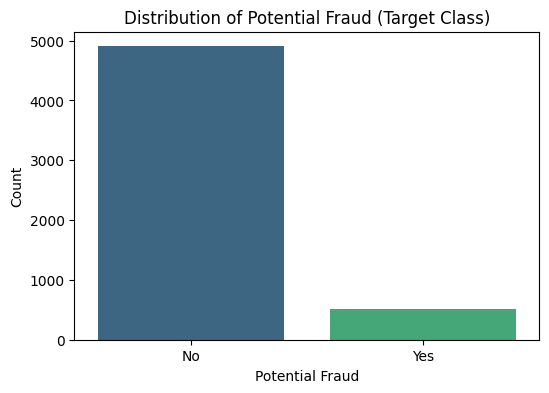

In [ ]:
print("--- Plotting Target Class Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=df_provider_merged, palette='viridis')
plt.title('Distribution of Potential Fraud (Target Class)')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was passed without assigning `hue` in `sns.countplot`. To fix this and follow best practices as suggested by the warning, I will explicitly set `hue='PotentialFraud'` and `legend=False`.



--- Plotting Target Class Distribution ---


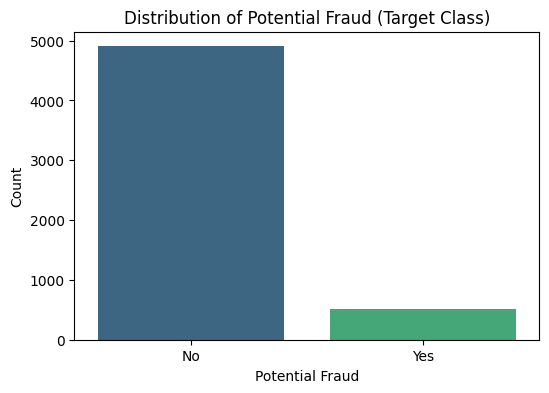

In [ ]:
print("--- Plotting Target Class Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=df_provider_merged, palette='viridis', hue='PotentialFraud', legend=False)
plt.title('Distribution of Potential Fraud (Target Class)')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()

**Reasoning**:
As per the instructions, I will generate the 'Claim Amount Trends (Monthly)' plot by extracting the month and year from `ClaimStartDt`, grouping by this new column, calculating the mean of `InscClaimAmtReimbursed`, and then plotting a line graph.



--- Plotting Claim Amount Trends (Monthly) ---


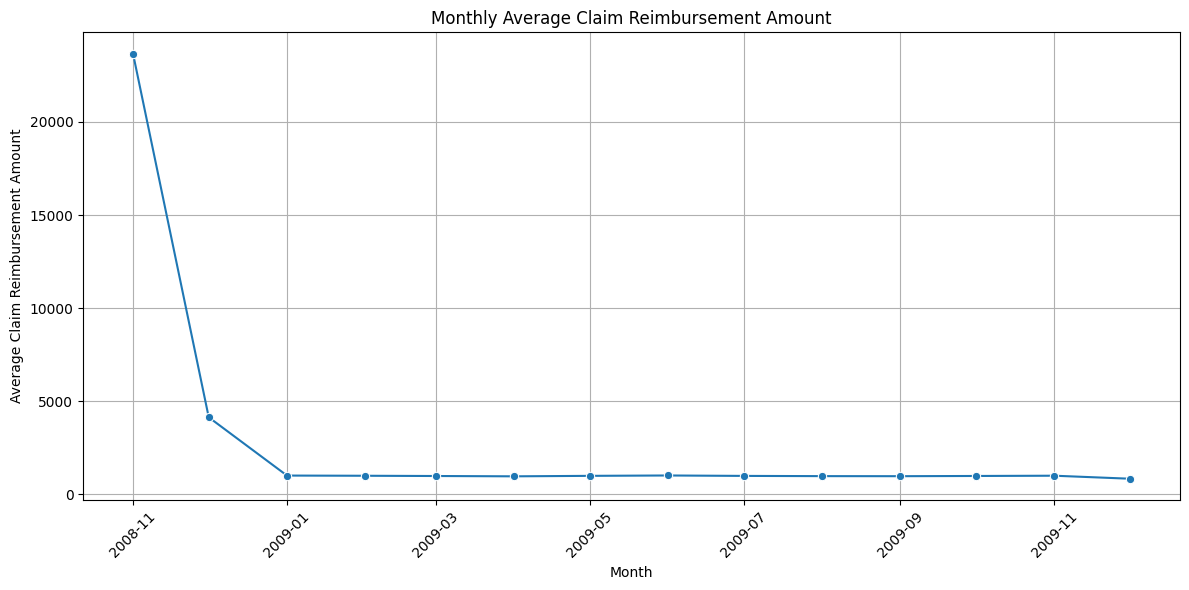

In [ ]:
print("--- Plotting Claim Amount Trends (Monthly) ---")
# 3. Claim Amount Trends (Monthly):
# a. Extract the month and year from ClaimStartDt
df_claims_beneficiary['ClaimMonthYear'] = df_claims_beneficiary['ClaimStartDt'].dt.to_period('M')

# b. Group by 'ClaimMonthYear' and calculate the mean of 'InscClaimAmtReimbursed'
monthly_avg_reimbursement = df_claims_beneficiary.groupby('ClaimMonthYear')['InscClaimAmtReimbursed'].mean().reset_index()

# Convert 'ClaimMonthYear' back to datetime for proper sorting and plotting
monthly_avg_reimbursement['ClaimMonthYear'] = monthly_avg_reimbursement['ClaimMonthYear'].dt.to_timestamp()

# c. Create a line plot of the monthly average claim amounts
plt.figure(figsize=(12, 6))
sns.lineplot(x='ClaimMonthYear', y='InscClaimAmtReimbursed', data=monthly_avg_reimbursement, marker='o')

# d. Add a title
plt.title('Monthly Average Claim Reimbursement Amount')

# e. Label the x-axis as 'Month' and the y-axis as 'Average Claim Reimbursement Amount'
plt.xlabel('Month')
plt.ylabel('Average Claim Reimbursement Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
As per the instructions, I will generate histograms for 'TotalClaimCount' and 'TotalInscClaimAmtReimbursed' from `df_provider_merged`, displaying them side-by-side with appropriate titles and labels.



--- Plotting Provider-level Summaries (Histograms) ---


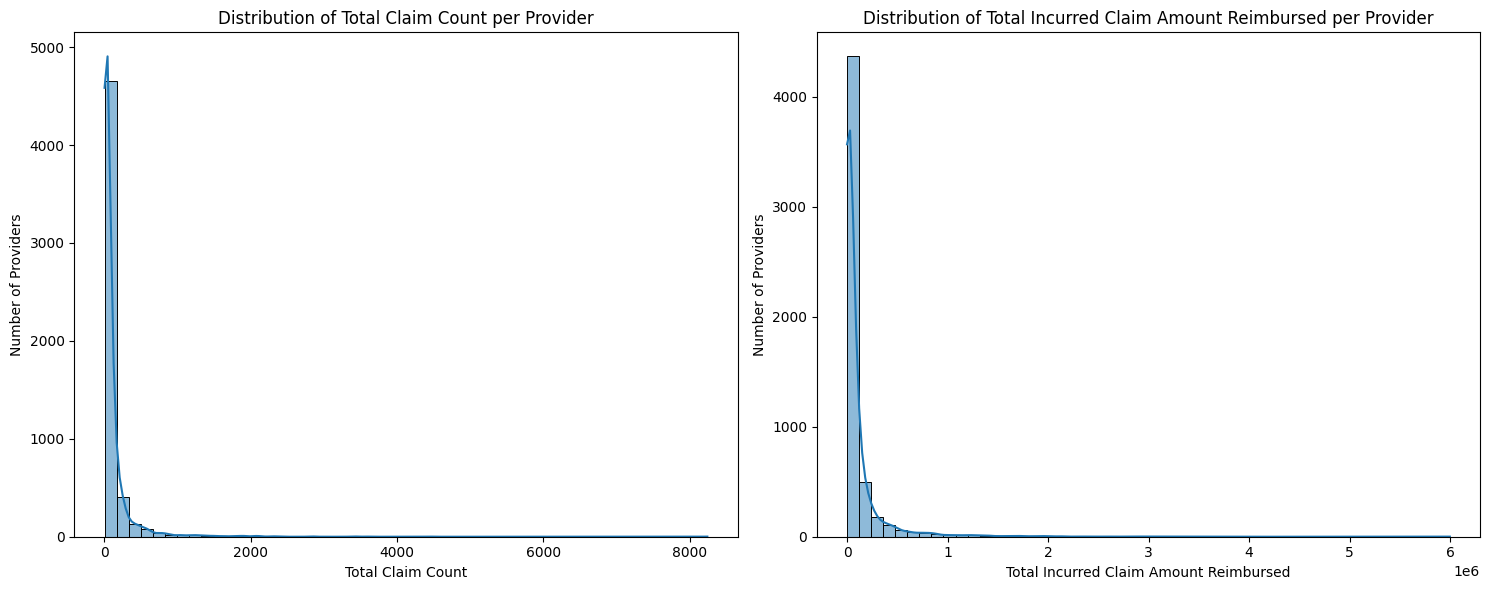

In [ ]:
print("--- Plotting Provider-level Summaries (Histograms) ---")

plt.figure(figsize=(15, 6))

# Histogram for TotalClaimCount
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_provider_merged['TotalClaimCount'], bins=50, kde=True)
plt.title('Distribution of Total Claim Count per Provider')
plt.xlabel('Total Claim Count')
plt.ylabel('Number of Providers')

# Histogram for TotalInscClaimAmtReimbursed
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df_provider_merged['TotalInscClaimAmtReimbursed'], bins=50, kde=True)
plt.title('Distribution of Total Incurred Claim Amount Reimbursed per Provider')
plt.xlabel('Total Incurred Claim Amount Reimbursed')
plt.ylabel('Number of Providers')

plt.tight_layout()
plt.show()

**Reasoning**:
As per the instructions, I will generate a correlation heatmap for the numerical features used in the fraud comparison. This involves selecting the relevant columns, calculating their correlation matrix, and then visualizing it with a heatmap.



--- Plotting Correlation Heatmap of Provider-Level Features ---


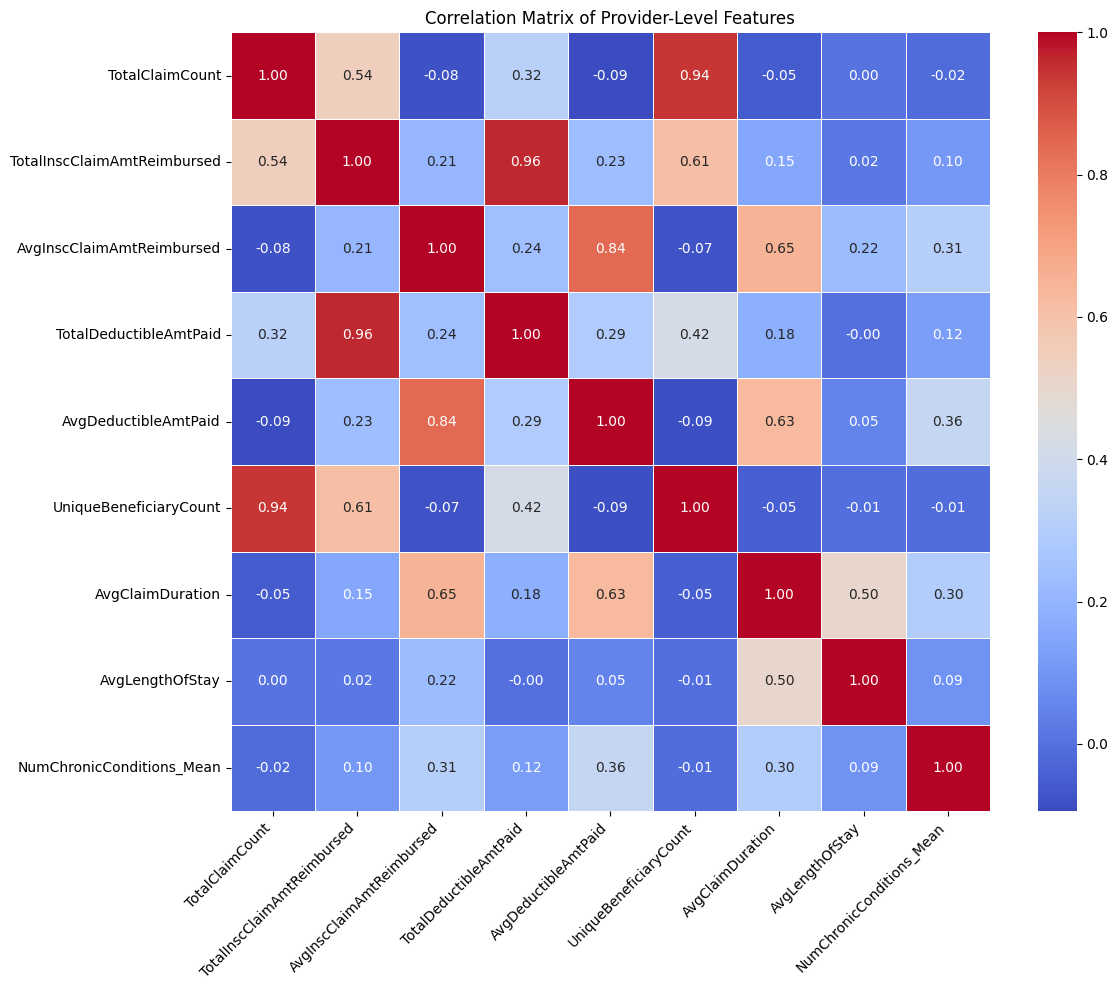

In [ ]:
print("--- Plotting Correlation Heatmap of Provider-Level Features ---")

# Select the numerical columns from df_provider_merged that were used in the fraud comparison
# (The 'comparison_features' list was already defined earlier)

# Calculate the correlation matrix
correlation_matrix = df_provider_merged[comparison_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Provider-Level Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print("--- Exporting Data for Modeling ---")

# Export the df_provider_merged DataFrame to a CSV file
df_provider_merged.to_csv('provider_features_for_modeling.csv', index=False)

print("df_provider_merged has been successfully exported to 'provider_features_for_modeling.csv'")

--- Exporting Data for Modeling ---
df_provider_merged has been successfully exported to 'provider_features_for_modeling.csv'


## Geographic or Temporal Patterns

### Subtask:
Visualize the total number of claims per state to identify geographic patterns.


**Reasoning**:
To visualize the total number of claims per state, I will first group the 'df_claims_beneficiary' DataFrame by 'State', count the claims, sort them, and then create a bar plot as instructed.



--- Visualizing Total Claims per State ---


/tmp/ipython-input-3620202954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='ClaimID', data=claims_per_state, palette='viridis')


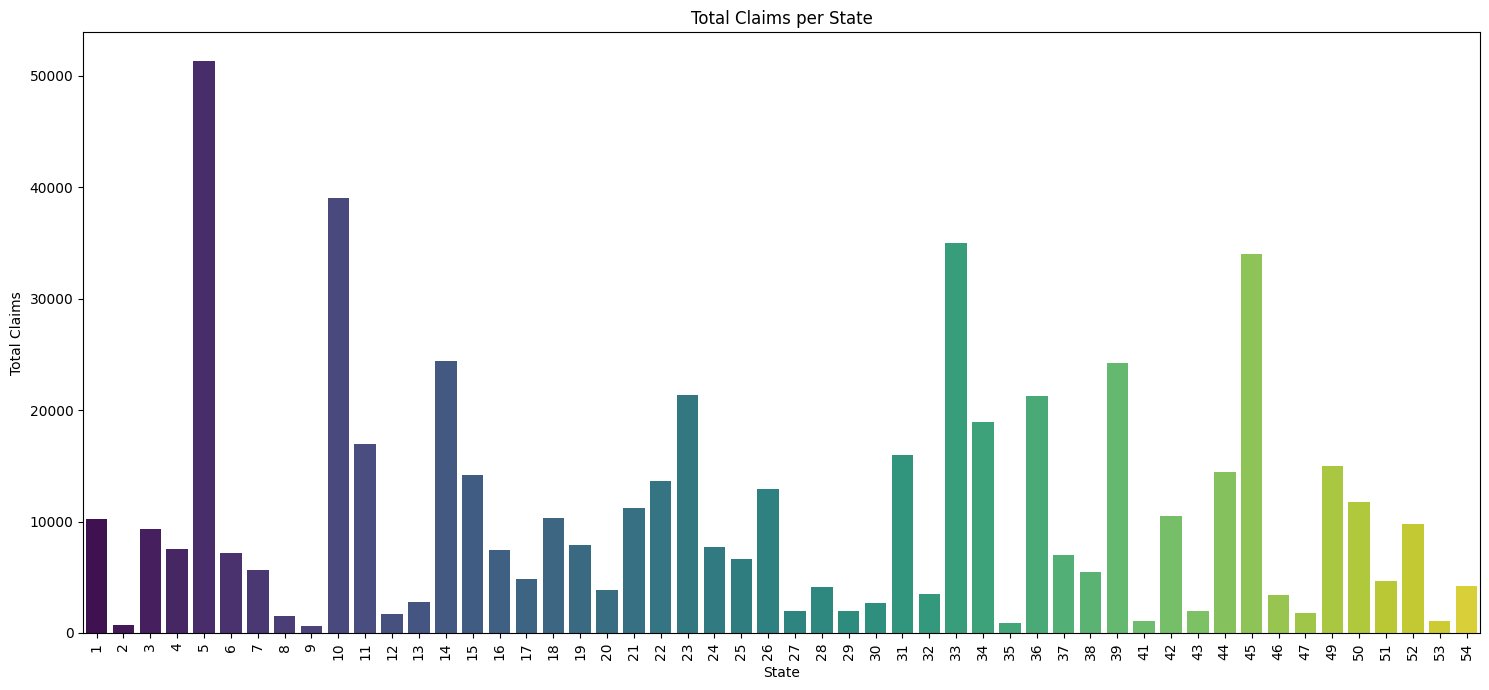

In [ ]:
print("--- Visualizing Total Claims per State ---")

# 1. Group the df_claims_beneficiary DataFrame by State and count the number of claims
claims_per_state = df_claims_beneficiary.groupby('State')['ClaimID'].count().reset_index()

# 2. Sort the states by the total number of claims in descending order
claims_per_state = claims_per_state.sort_values(by='ClaimID', ascending=False)

# 3. Create a bar plot using the aggregated data
plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='ClaimID', data=claims_per_state, palette='viridis')

# 4. Add a title
plt.title('Total Claims per State')

# 5. Label the x-axis and y-axis
plt.xlabel('State')
plt.ylabel('Total Claims')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous `sns.barplot` call generated a `FutureWarning` because `palette` was used without `hue`. I will fix this by explicitly setting `hue='State'` and `legend=False` as suggested by the warning.



--- Visualizing Total Claims per State ---


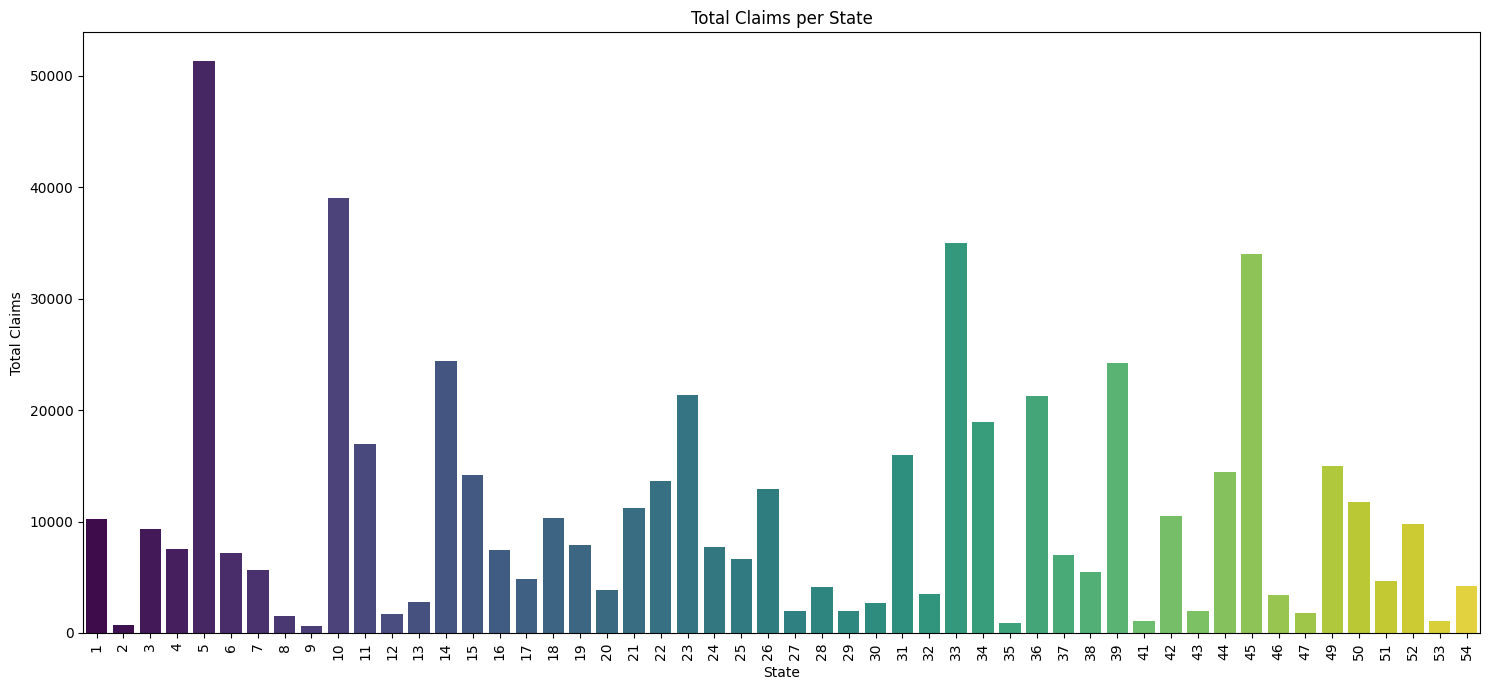

In [ ]:
print("--- Visualizing Total Claims per State ---")

# 1. Group the df_claims_beneficiary DataFrame by State and count the number of claims
claims_per_state = df_claims_beneficiary.groupby('State')['ClaimID'].count().reset_index()

# 2. Sort the states by the total number of claims in descending order
claims_per_state = claims_per_state.sort_values(by='ClaimID', ascending=False)

# 3. Create a bar plot using the aggregated data
plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='ClaimID', data=claims_per_state, palette='viridis', hue='State', legend=False)

# 4. Add a title
plt.title('Total Claims per State')

# 5. Label the x-axis and y-axis
plt.xlabel('State')
plt.ylabel('Total Claims')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()